In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns
from statsmodels.stats.anova import anova_lm

In [2]:
data_all_years = pd.read_csv('data_all.csv', sep = ',')
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years = data_all_years.drop(data_all_years.index[569])

In [3]:
predictors = ["exit_velocity_avg", "launch_angle_avg" ,"sweet_spot_percent", "barrels", "barrel_batted_rate", "solidcontact_percent", "flareburner_percent", "poorlyunder_percent", "poorlytopped_percent", "poorlyweak_percent", "hard_hit_percent", "z_swing_percent", "z_swing_miss_percent", "oz_swing_percent", "oz_swing_miss_percent", "oz_contact_percent", "out_zone_swing_miss", "out_zone_swing", "out_zone_percent", "out_zone", "meatball_swing_percent", "meatball_percent", "pitch_count_offspeed", "pitch_count_fastball", "pitch_count_breaking", "pitch_count", "iz_contact_percent", "in_zone_swing_miss", "in_zone_swing", "in_zone_percent", "in_zone", "edge_percent", "edge", "whiff_percent", "swing_percent", "pull_percent", "straightaway_percent", "opposite_percent", "batted_ball", "f_strike_percent", "groundballs_percent", "groundballs", "flyballs_percent", "flyballs", "linedrives_percent", "linedrives", "popups_percent", "popups", "n_bolts", "UBR"]

<ipython-input-4-591e4abf9182>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


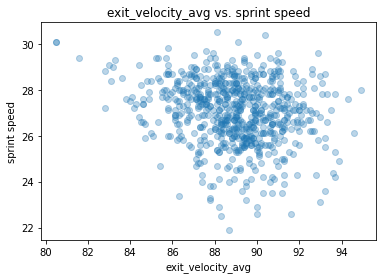

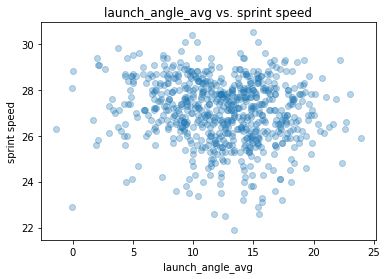

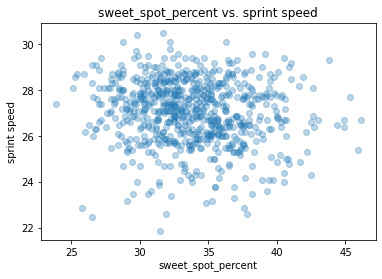

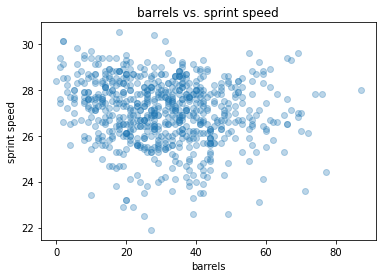

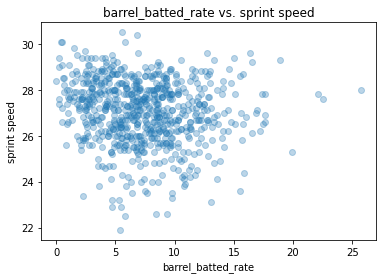

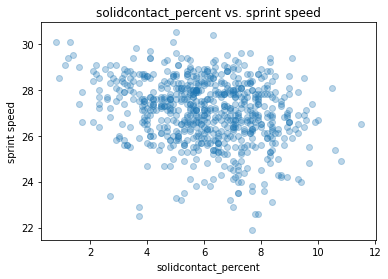

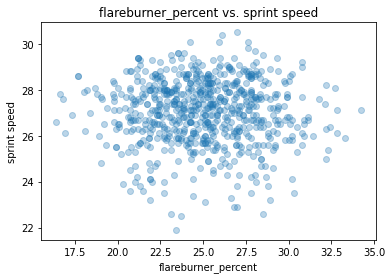

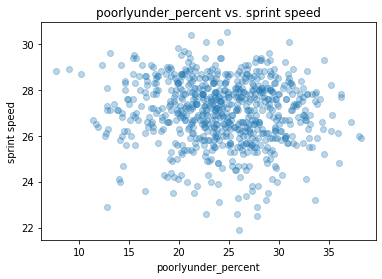

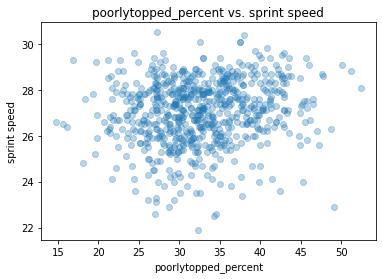

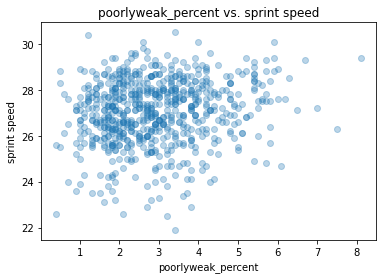

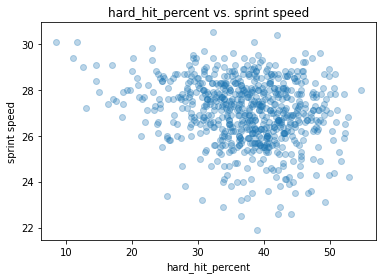

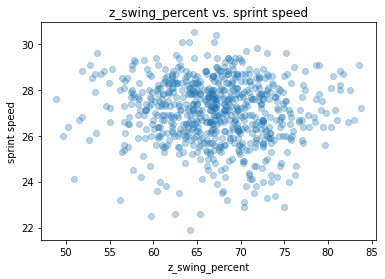

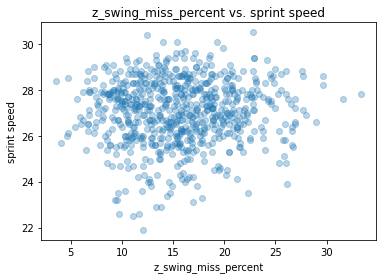

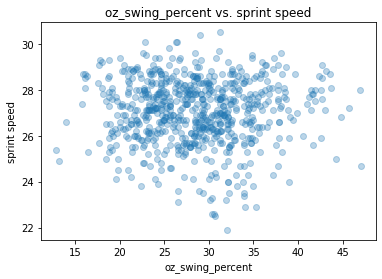

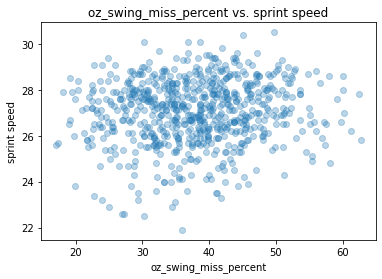

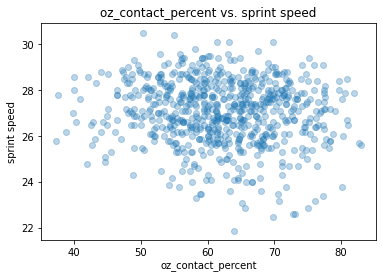

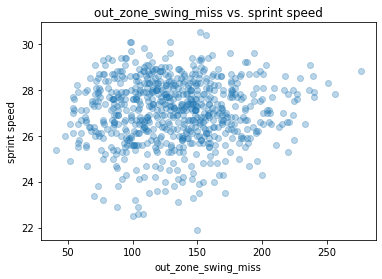

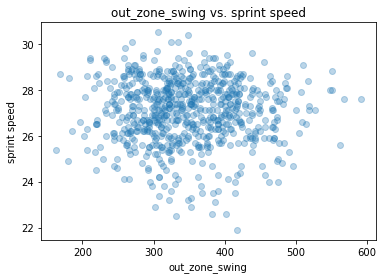

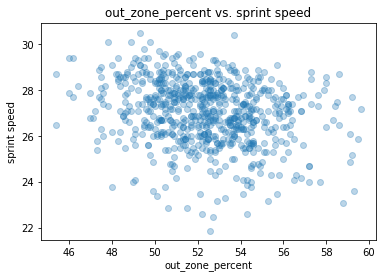

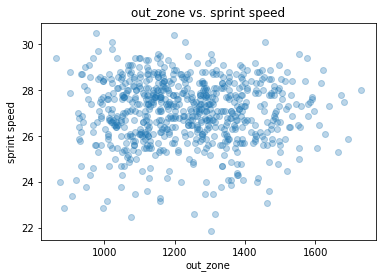

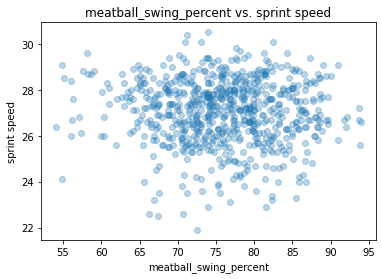

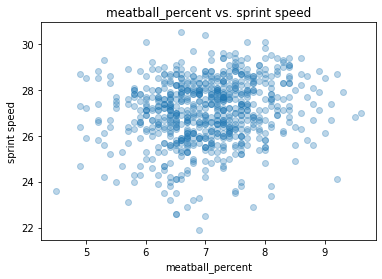

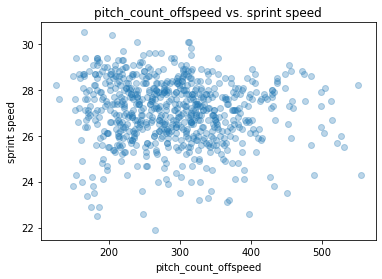

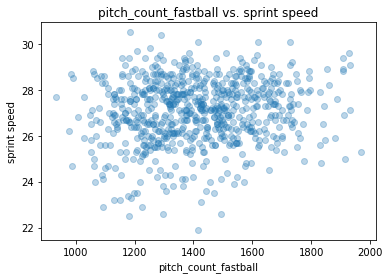

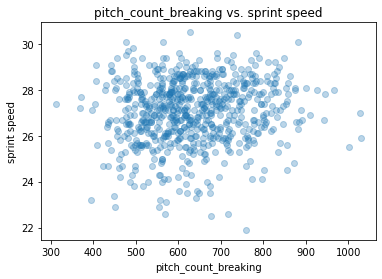

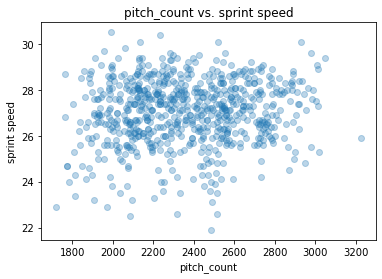

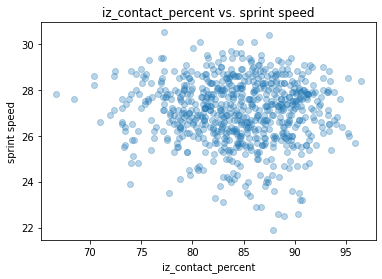

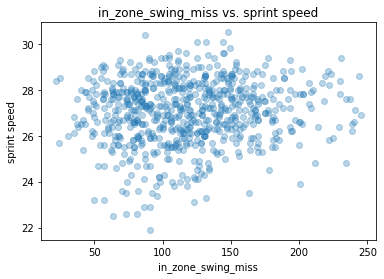

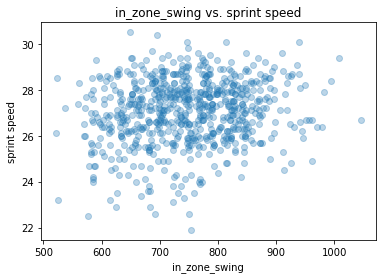

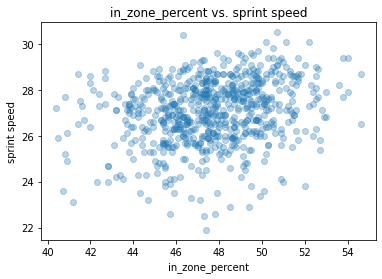

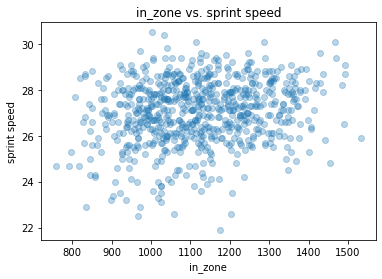

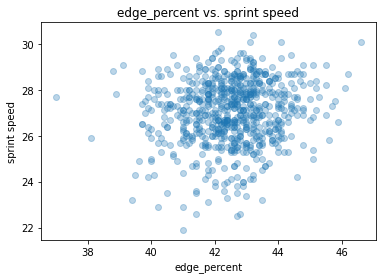

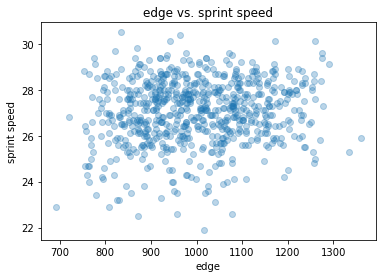

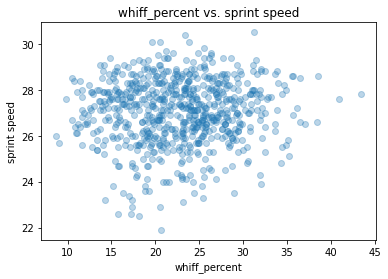

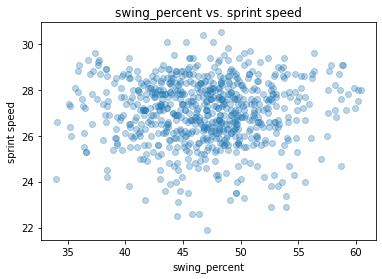

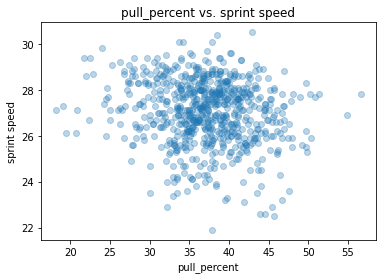

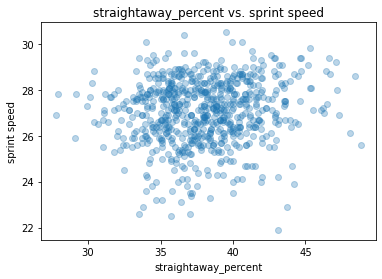

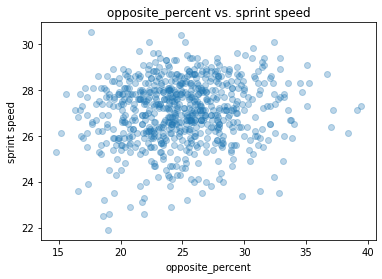

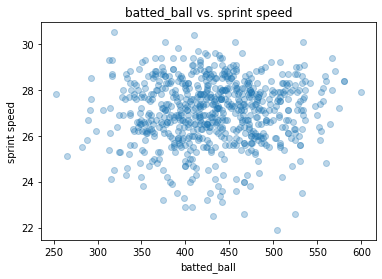

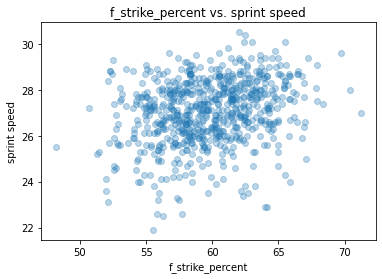

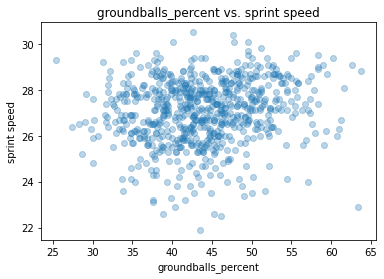

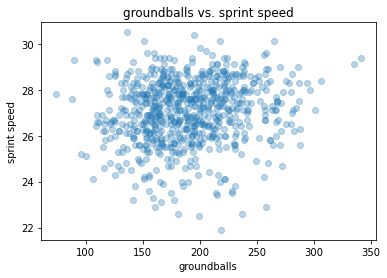

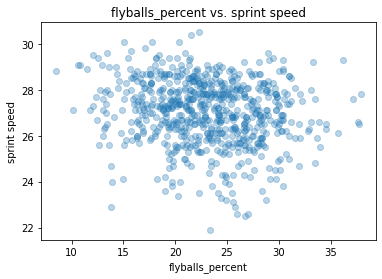

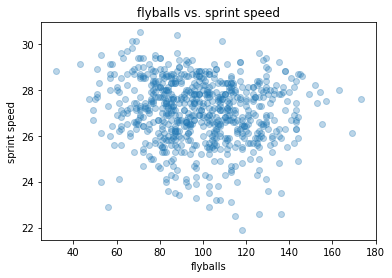

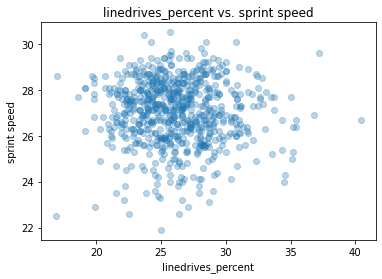

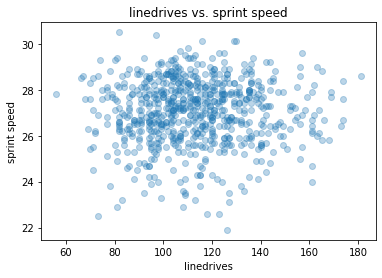

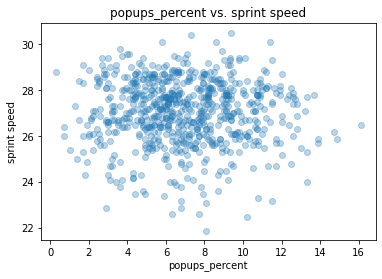

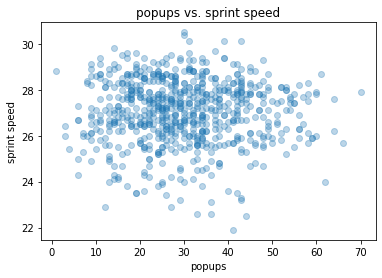

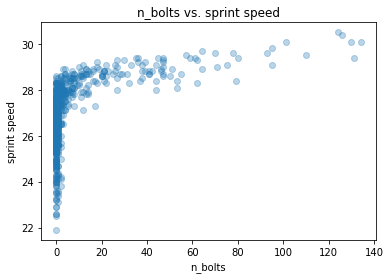

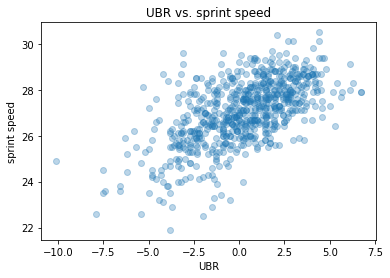

In [4]:
i = 0
for x in predictors:
  plt.figure(i)
  plt.scatter(data_all_years[x], data_all_years['sprint_speed'],alpha = 0.3)
  plt.xlabel(x)
  plt.ylabel('sprint speed')
  plt.title(x + ' vs. sprint speed')
  i = i + 1

In [5]:
X = np.array(data_all_years[["solidcontact_percent","barrels","flyballs_percent", "f_strike_percent","n_bolts", "UBR"]])

In [6]:
import statsmodels.api as sm

In [7]:
ss_model = sm.OLS(data_all_years['sprint_speed'],X)
ss_model_results = ss_model.fit()
print(ss_model_results.pvalues)

x1    3.163620e-02
x2    9.549012e-02
x3    1.823224e-11
x4    0.000000e+00
x5    1.163428e-15
x6    3.103062e-24
dtype: float64


Based on the above p - value output, it seems that all but the second predictor are signidficant(based off of a minimal significance p-value threshold of 0.05 or below). This insignificant predictor is:

barrels(with p-value = 0.0955)


In [8]:
# Make a reduced model without the above predictor

ss_preds_red = np.array(data_all_years[["solidcontact_percent","flyballs_percent", "f_strike_percent","n_bolts", "UBR"]])

ss_model_red = sm.OLS(data_all_years['sprint_speed'],ss_preds_red)
ss_model_red_results = ss_model_red.fit()

In [9]:
# Running the anova model to test whether it is ok to remove this predictor

anovatest = anova_lm(ss_model_red_results, ss_model_results)
print(anovatest)

   df_resid          ssr  df_diff   ss_diff         F   Pr(>F)
0     699.0  1716.754130      0.0       NaN       NaN      NaN
1     698.0  1709.927073      1.0  6.827057  2.786836  0.09549


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [10]:
# From the above output we can see that barrels is not adding extra significance to the model so we can discard it, so the final base model is
ss_model_red_results
# sprint_speed ~ solidcontact_percent + flyballs_percent + f_strike_percent + n_bolts + UBR

In [11]:
# Start of the polynomial model process

data_all_mod_ss = data_all_years.copy()

data_all_mod_ss["solidcontact_percent^2"] = data_all_mod_ss["solidcontact_percent"] * data_all_mod_ss["solidcontact_percent"]

data_all_mod_ss["flyballs_percent^2"] = data_all_mod_ss["flyballs_percent"] * data_all_mod_ss["flyballs_percent"]

data_all_mod_ss["f_strike_percent^2"] = data_all_mod_ss["f_strike_percent"] * data_all_mod_ss["f_strike_percent"]

data_all_mod_ss["n_bolts^2"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

data_all_mod_ss["UBR^2"] = data_all_mod_ss["UBR"] * data_all_mod_ss["UBR"]

data_all_mod_ss["f_strike_percent^3"] = data_all_mod_ss["f_strike_percent"] * data_all_mod_ss["f_strike_percent"] * data_all_mod_ss["f_strike_percent"]

data_all_mod_ss["n_bolts^3"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

data_all_mod_ss["UBR^3"] = data_all_mod_ss["UBR"] * data_all_mod_ss["UBR"] * data_all_mod_ss["UBR"]

data_all_mod_ss["f_strike_percent^4"] = data_all_mod_ss["f_strike_percent"] * data_all_mod_ss["f_strike_percent"] * data_all_mod_ss["f_strike_percent"]* data_all_mod_ss["f_strike_percent"]

data_all_mod_ss["n_bolts^4"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

data_all_mod_ss["n_bolts^5"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

data_all_mod_ss["n_bolts^6"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

data_all_mod_ss["n_bolts^7"] = data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"] * data_all_mod_ss["n_bolts"]

X_2_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","solidcontact_percent^2","flyballs_percent^2","f_strike_percent^2","n_bolts^2","UBR^2"]])


ss_poly = sm.OLS(data_all_mod_ss['sprint_speed'],X_2_ss)
ss_poly = ss_poly.fit()

print(ss_poly.pvalues)

x1      9.142629e-01
x2      9.006187e-01
x3     6.587141e-174
x4      4.069429e-37
x5      1.174491e-51
x6      7.334365e-01
x7      5.690680e-01
x8     8.646712e-118
x9      1.037036e-14
x10     5.881618e-04
dtype: float64


In [12]:
#Anova test for first polynomial set
anovatest = anova_lm(ss_model_red_results, ss_poly)
print(anovatest)

   df_resid          ssr  df_diff      ss_diff           F         Pr(>F)
0     699.0  1716.754130      0.0          NaN         NaN            NaN
1     694.0   589.962962      5.0  1126.791168  265.099039  2.807755e-158


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [13]:
# There are significant polynomial terms within this model but from the p-value output it looks like we can eliminate x6, and x7 as they don't seem to be adding to the model.

X_3_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2"]])

ss_poly_2 = sm.OLS(data_all_mod_ss['sprint_speed'],X_3_ss)
ss_poly_2 = ss_poly_2.fit()

#Run an anova test to compare the first polynomial model with this reduced one to show that no significance was lost.

anovatest = anova_lm(ss_poly_2, ss_poly)
print(anovatest)


   df_resid         ssr  df_diff   ss_diff        F    Pr(>F)
0     696.0  590.272345      0.0       NaN      NaN       NaN
1     694.0  589.962962      2.0  0.309383  0.18197  0.833666


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [14]:
# As seen from the very high p-value, the two polynomial predictors that were removed did not significantly impact the original model. Now we add on cubic terms to the remaining significant quadratic terms to see if significance can be increased at higher exponential degrees.

X_4_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","UBR^3"]])

ss_poly_3 = sm.OLS(data_all_mod_ss['sprint_speed'],X_4_ss)
ss_poly_3 = ss_poly_3.fit()

print(ss_poly_3.pvalues)

x1     9.842534e-02
x2     1.220293e-02
x3     7.254651e-18
x4     4.721711e-29
x5     4.406536e-28
x6     2.308082e-04
x7     6.850056e-13
x8     2.126070e-05
x9     3.817879e-02
x10    4.424179e-09
x11    2.170411e-01
dtype: float64


In [15]:
# It looks like the only 3rd degree polynomial that is insignificant is the last one, UBR^3. So lets make a reduced model without it and compare to the model with x11 included to verify using an anova test

X_5_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3"]])

ss_poly_4 = sm.OLS(data_all_mod_ss['sprint_speed'],X_5_ss)
ss_poly_4 = ss_poly_4.fit()

anovatest = anova_lm(ss_poly_4, ss_poly_3)
print(anovatest)



   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     694.0  559.330573      0.0       NaN       NaN       NaN
1     693.0  558.101135      1.0  1.229438  1.526607  0.217041


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [16]:
# As seen from the comparison above it is reasonable to remove UBR^3 and now see if the addition of quartic terms for f_strike_percent and n_bolts will increase the significance further.

X_6_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","f_strike_percent^4","n_bolts^4"]])

ss_poly_5 = sm.OLS(data_all_mod_ss['sprint_speed'],X_6_ss)
ss_poly_5 = ss_poly_5.fit()

print(ss_poly_5.pvalues)

x1     1.278231e-01
x2     5.270427e-03
x3     4.604709e-01
x4     4.977564e-30
x5     3.533305e-43
x6     1.636167e-01
x7     6.689109e-15
x8     4.704931e-06
x9     1.140517e-01
x10    1.863207e-10
x11    9.760983e-02
x12    2.843778e-08
dtype: float64


In [17]:
#It looks like we can remove the quartic term for f_strike_percent as it is above the significance threshold of 0.05. We will compare the above model to a reduced model without the term and determine wether it is legal to remove the term.

X_6_ss_red = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","n_bolts^4"]])

ss_poly_5_red = sm.OLS(data_all_mod_ss['sprint_speed'],X_6_ss_red)
ss_poly_5_red = ss_poly_5_red.fit()

anovatest = anova_lm(ss_poly_5_red, ss_poly_5)
print(anovatest)


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


   df_resid         ssr  df_diff  ss_diff         F   Pr(>F)
0     693.0  533.704335      0.0      NaN       NaN      NaN
1     692.0  531.590565      1.0  2.11377  2.751608  0.09761


In [18]:
# It appears that we can remove the quartic term for f_strike_percent and it will not have a significant impact on the model overall, so we will add on a 5th degree term for n_bolts to see if there is significance beyond its quartic term.

X_7_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","n_bolts^4","n_bolts^5"]])

ss_poly_6 = sm.OLS(data_all_mod_ss['sprint_speed'],X_7_ss)
ss_poly_6 = ss_poly_6.fit()

print(ss_poly_6.pvalues)

x1     1.386786e-01
x2     5.353904e-03
x3     1.439359e-19
x4     6.494339e-25
x5     5.801415e-42
x6     5.567456e-05
x7     1.924905e-10
x8     2.524145e-06
x9     1.734473e-02
x10    2.150360e-06
x11    1.404033e-04
x12    1.328471e-03
dtype: float64


In [19]:
#It appears that all the polynomial terms are significant, so we will see if the 5th degree term is significant when compared to just the 4th degree model and then add a 6th order polynomial to n_bolts to see if significance extends beyond 5 degrees.

anovatest = anova_lm(ss_poly_5_red, ss_poly_6)
print(anovatest)


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


   df_resid         ssr  df_diff  ss_diff          F    Pr(>F)
0     693.0  533.704335      0.0      NaN        NaN       NaN
1     692.0  525.811715      1.0  7.89262  10.387165  0.001328


In [20]:
#From the above anova output it seems that the 5th order polynomial model is more significant than just the quartic model so we will add on a 6th order polynomial to n_bolts.

X_8_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","n_bolts^4","n_bolts^5","n_bolts^6"]])

ss_poly_7 = sm.OLS(data_all_mod_ss['sprint_speed'],X_8_ss)
ss_poly_7 = ss_poly_7.fit()

print(ss_poly_7.pvalues)

x1     1.165755e-01
x2     4.821713e-03
x3     6.580850e-20
x4     3.756386e-19
x5     2.187289e-40
x6     3.876747e-05
x7     4.746872e-07
x8     1.735479e-06
x9     1.385407e-02
x10    3.367997e-04
x11    4.770569e-03
x12    1.826125e-02
x13    3.972964e-02
dtype: float64


In [21]:
# It seems that all polynomial terms are still significant so we will extend the model to include a 7th degree polynomial of n_bolts

X_9_ss = np.array(data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","n_bolts^4","n_bolts^5","n_bolts^6","n_bolts^7"]])

ss_poly_8 = sm.OLS(data_all_mod_ss['sprint_speed'],X_9_ss)
ss_poly_8 = ss_poly_8.fit()

print(ss_poly_8.pvalues)

x1     1.074751e-01
x2     3.616182e-03
x3     1.796786e-19
x4     5.081794e-15
x5     1.480570e-39
x6     6.002368e-05
x7     4.207912e-05
x8     1.491453e-06
x9     1.815690e-02
x10    4.769007e-03
x11    2.790987e-02
x12    6.597061e-02
x13    1.084935e-01
x14    1.502952e-01
dtype: float64


In [22]:
# From the p-values it seems we might have hit the end of the significance trail at the 6th order degree polynomial model, so we will verify that the 7th order degree polynomial is not significant by comparing it to the previous 6th order degree model via an anova test.

anovatest = anova_lm(ss_poly_7, ss_poly_8)
print(anovatest)

/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


   df_resid         ssr  df_diff   ss_diff         F    Pr(>F)
0     691.0  522.600902      0.0       NaN       NaN       NaN
1     690.0  521.034885      1.0  1.566017  2.073857  0.150296


In [23]:
# As expected, the 7th degree model does not add any significance to the 6th order degree model, so as a result the final model is:

ss_poly_7

In [24]:
# We can compare the significance of this final model to the original and to quadratic model using anova tests.

# First: Compare to original, non-polynomial model
anovatest = anova_lm(ss_model_red_results, ss_poly_7)
print(anovatest)
# As one can tell, this 6th order degree model is magnitudes more significan than the base model.

#Second: Compare to original polynomial/quadratic model
anovatest = anova_lm(ss_poly, ss_poly_7)
print(anovatest)
# Again, the most recent model is much more significant than the fiorst polynomial model and that is evident by the extremely low p-value, but one thing to note is just how much extra significance the polynomial terms added to the base model. This can be seen from the difference in p-values between the two comparisons, although both are extremely significant, the difference in significance between the quadratic vs. the 6th degree model is much smaller than that of the 6th degree model and the base model without polynomial terms. Therefore, just adding some extra polynomial terms can do a world of difference in terms of significnace.

   df_resid          ssr  df_diff      ss_diff           F         Pr(>F)
0     699.0  1716.754130      0.0          NaN         NaN            NaN
1     691.0   522.600902      8.0  1194.153229  197.368556  8.119917e-173
   df_resid         ssr  df_diff   ss_diff         F        Pr(>F)
0     694.0  589.962962      0.0       NaN       NaN           NaN
1     691.0  522.600902      3.0  67.36206  29.68944  4.608573e-18


/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/Users/jonasmilano/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)



Final Model:

sprint_speed ~ solidcontact_percent + flyballs_percent + f_strike_percent + n_bolts + UBR + f_strike_percent^2 + n_bolts^2 + UBR^2 + f_strike_percent^3 + n_bolts^3 + n_bolts^4 + n_bolts^5 + n_bolts^6


### Interpretations/Conclusions

After looking at the scatterplots and coming to a consensus on which predictors to include based on the information the scatterplots provided, we ended up with 6 predictor model initially. 

Although were on the fence about some of the predictors such as "barrels" and "flyballs_percent", due to the fact that their scatterplots showed a very weak associatio to sprint speed, we endded up removing "barrels" after using an anova comparison test. Therfore we ended up with a 5 predicot final model that told us "solidcontact_percent","flyballs_percent", "f_strike_percent", "n_bolts", and "UBR" significntly impacted sprint_speed. 

Although we were not surpirsed, and welcomed the signficance of n_bolts and UBR as they are both running stats, we were intrigued as to why there was a significant association between the other three predictors. 

We figured that for both solidcontact_percent and flyballs_percent the player would be inclined to run faster as well as satisfy some of the criteria needed for a better UBR score. On a hard hit ball the player would want to advance as much as possible and get as close to home as he could, and on the flipside, the player who would hit a fluball would be inclined to run fast to the gain as many bases as possible in case the ball lands in a gap or an outfielder misses it. 

However, the odd ball ended up being the f_strike_percent predictor which details the percent of a player's at bats where they take the first strike. Besides some situational reasons that would cause a player who happened to be fast, to intentionally take the first strike, it was tough to come up with a conclusion on why a player with a higher first pitch strike percent would have a higher sprint speed. One reason that may contribute to this relationship however may be that the player could get down in the count and will end up trying to get to first on a drop third, or one reason could be that players who are faster in general take the first pitch for a strike or just arent as aggressive in the box.

Overall we ended up with a 5 predictor model that we feel significantly resembles the relationship between player speed and offensive characteristics.

### Limitations

This model suffers from the same limitation on scatterplot accuracy as mentioned in the UBR model limitations section.

Additionally, sprint speed is the physical calculation in feet per second of the players ability to cover a certain distance in a matter of time, and some of the other statistics have different contextual values that cannot really rlate to sprint speed values(like UBR being just a rating system and sprint speed being a physical metric). 

### Acknowledgements

statsmodels.api 


In [39]:
# Sprint Speed Model Residuals analysis


data_all_ss = data_all_mod_ss[["solidcontact_percent","flyballs_percent","f_strike_percent", "n_bolts", "UBR","f_strike_percent^2","n_bolts^2","UBR^2","f_strike_percent^3","n_bolts^3","n_bolts^4","n_bolts^5","n_bolts^6"]]

# Create the design matrix of all X values

ss_design_matrix = np.zeros([len(data_all_mod_ss),13])
for x in range(0,len(data_all_mod_ss)):
    ss_design_matrix[x] = np.array(data_all_ss.iloc[x])

# Get Fitted Values

ss_fitted = ss_poly_7.predict(ss_design_matrix)


# Get Actual UBR values of each player from data

ss_actual = np.array(data_all_mod_ss['sprint_speed'])

# Calculate Residuals

ss_resids = ss_fitted - ss_actual

# Residuals Matrix

ss_residssq = np.zeros(len(ss_resids))
for x in range(0,len(ss_residssq)):
    ss_residssq[x] = ss_resids[x]*ss_resids[x]


    
ss_residssq

array([3.10681169e-01, 1.03764796e-02, 1.18560644e+00, 5.83387980e-01,
       8.62901374e-01, 2.14915113e+00, 7.18576740e-02, 1.00600006e+00,
       9.89912529e-01, 2.37213445e-01, 2.23585489e+00, 3.89456795e-04,
       4.32296907e-01, 1.92967461e-01, 2.58992064e-02, 7.40273149e-01,
       2.73945108e-04, 1.17533370e+00, 6.51563787e-01, 6.79809266e-01,
       2.57075085e-01, 4.43997414e+00, 4.34025617e-01, 8.51162120e-01,
       1.15983359e+00, 2.71536110e-01, 2.28896573e-01, 8.72163653e-01,
       1.00053015e-01, 3.10026313e-01, 1.19400742e-01, 2.56714472e-01,
       6.54602054e-04, 2.27361388e-01, 7.66325785e-02, 3.93802775e-03,
       3.67409670e-01, 2.76796404e-01, 1.38024856e+00, 1.20423885e+00,
       1.90131068e-03, 7.29438461e-01, 1.64210208e-03, 1.30988385e-01,
       2.40866968e-01, 1.94092193e+00, 5.15920361e+00, 1.16860017e+00,
       2.54462369e+00, 1.87008791e-03, 2.02600736e+00, 9.47249732e-02,
       1.53472845e+00, 2.55539785e-02, 1.64684933e+00, 3.37517172e-01,
      

In [26]:
ss_design_matrix = np.zeros([len(data_all_mod_ss),13])
for x in range(0,len(data_all_mod_ss)):
    ss_design_matrix[x] = np.array(data_all_ss.iloc[x])

In [27]:
ss_fitted = ss_poly_7.predict(ss_design_matrix)
ss_fitted

array([26.25738781, 28.29813499, 28.78885556, 26.86379839, 28.92892485,
       27.06599834, 26.43193718, 26.60299555, 27.39494348, 29.18704563,
       26.40472247, 28.28026534, 26.65749289, 26.86071938, 26.0609323 ,
       27.73960872, 29.08344871, 24.68412808, 27.19280499, 27.42450547,
       26.30702572, 26.30712462, 29.55880621, 27.42258448, 25.77695571,
       27.42109127, 26.97843137, 26.56610298, 26.51631158, 28.95680007,
       26.55445587, 27.00666998, 26.77441481, 25.72317573, 26.6231741 ,
       28.63724629, 27.30614328, 27.27388556, 26.3748398 , 27.20262183,
       28.94360402, 26.0540717 , 27.44052286, 25.96192318, 25.390782  ,
       27.19316974, 26.22861196, 27.41898188, 27.29518767, 27.14324451,
       27.67662115, 28.49222578, 26.16115843, 27.55985612, 25.28329627,
       26.98096228, 29.42026347, 28.65763572, 26.61293039, 28.31094564,
       27.32496277, 26.89857996, 28.66396812, 27.33281048, 28.3581651 ,
       27.76182264, 26.17172599, 27.14407937, 27.75544699, 26.77

In [28]:
ss_actual = np.array(data_all_mod_ss['sprint_speed'])
ss_actual

array([25.7, 28.4, 27.7, 26.1, 28. , 25.6, 26.7, 25.6, 26.4, 28.7, 27.9,
       28.3, 26. , 27.3, 25.9, 28.6, 29.1, 23.6, 28. , 26.6, 25.8, 24.2,
       28.9, 26.5, 24.7, 26.9, 26.5, 27.5, 26.2, 28.4, 26.9, 26.5, 26.8,
       26.2, 26.9, 28.7, 26.7, 27.8, 25.2, 28.3, 28.9, 25.2, 27.4, 25.6,
       24.9, 25.8, 28.5, 28.5, 25.7, 27.1, 29.1, 28.8, 27.4, 27.4, 24. ,
       26.4, 29.1, 28.3, 27.6, 28.4, 27.7, 25.6, 27.8, 27.4, 28.5, 27.1,
       24.3, 26.5, 28. , 28.2, 28.1, 25.9, 29.7, 26.9, 27.3, 29.5, 27.3,
       24. , 27.4, 27.4, 25.6, 29.6, 26.3, 27.8, 26.5, 29.1, 23.2, 28.5,
       23.4, 24.3, 25. , 26.6, 26.9, 25.8, 25.7, 27.9, 23.1, 28.6, 28.2,
       26.6, 27.2, 27.6, 26. , 25.6, 28.5, 25.8, 28.7, 26.3, 28.5, 29. ,
       25.4, 26.8, 23.5, 24.3, 26.6, 24. , 27.8, 28.4, 27.4, 26.1, 23.9,
       27.1, 28. , 24.7, 25.5, 26. , 28.7, 28.9, 27. , 25.4, 28.7, 29.6,
       27.1, 26.1, 28. , 26.1, 25.3, 26.3, 27.4, 28.8, 27.2, 25.6, 24.6,
       28.4, 27.4, 26.3, 25.3, 26.4, 25.7, 25.9, 27

In [29]:
ss_resids = ss_fitted - ss_actual
ss_resids

array([ 5.57387808e-01, -1.01865007e-01,  1.08885556e+00,  7.63798390e-01,
        9.28924848e-01,  1.46599834e+00, -2.68062817e-01,  1.00299555e+00,
        9.94943480e-01,  4.87045629e-01, -1.49527753e+00, -1.97346597e-02,
        6.57492895e-01, -4.39280618e-01,  1.60932304e-01, -8.60391277e-01,
       -1.65512872e-02,  1.08412808e+00, -8.07195012e-01,  8.24505467e-01,
        5.07025724e-01,  2.10712462e+00,  6.58806206e-01,  9.22584478e-01,
        1.07695571e+00,  5.21091269e-01,  4.78431367e-01, -9.33897025e-01,
        3.16311579e-01,  5.56800066e-01, -3.45544125e-01,  5.06669984e-01,
       -2.55851921e-02, -4.76824274e-01, -2.76825899e-01, -6.27537070e-02,
        6.06143275e-01, -5.26114440e-01,  1.17483980e+00, -1.09737817e+00,
        4.36040214e-02,  8.54071695e-01,  4.05228588e-02,  3.61923176e-01,
        4.90781997e-01,  1.39316974e+00, -2.27138804e+00, -1.08101812e+00,
        1.59518767e+00,  4.32445130e-02, -1.42337885e+00, -3.07774224e-01,
       -1.23884157e+00,  

In [30]:
ss_residssq = np.zeros(len(ss_resids))
for x in range(0,len(ss_residssq)):
    ss_residssq[x] = ss_resids[x]*ss_resids[x]
ss_residssq

array([3.10681169e-01, 1.03764796e-02, 1.18560644e+00, 5.83387980e-01,
       8.62901374e-01, 2.14915113e+00, 7.18576740e-02, 1.00600006e+00,
       9.89912529e-01, 2.37213445e-01, 2.23585489e+00, 3.89456795e-04,
       4.32296907e-01, 1.92967461e-01, 2.58992064e-02, 7.40273149e-01,
       2.73945108e-04, 1.17533370e+00, 6.51563787e-01, 6.79809266e-01,
       2.57075085e-01, 4.43997414e+00, 4.34025617e-01, 8.51162120e-01,
       1.15983359e+00, 2.71536110e-01, 2.28896573e-01, 8.72163653e-01,
       1.00053015e-01, 3.10026313e-01, 1.19400742e-01, 2.56714472e-01,
       6.54602054e-04, 2.27361388e-01, 7.66325785e-02, 3.93802775e-03,
       3.67409670e-01, 2.76796404e-01, 1.38024856e+00, 1.20423885e+00,
       1.90131068e-03, 7.29438461e-01, 1.64210208e-03, 1.30988385e-01,
       2.40866968e-01, 1.94092193e+00, 5.15920361e+00, 1.16860017e+00,
       2.54462369e+00, 1.87008791e-03, 2.02600736e+00, 9.47249732e-02,
       1.53472845e+00, 2.55539785e-02, 1.64684933e+00, 3.37517172e-01,
      

In [31]:
print("sprint speed model average residual: " + str(round(ss_residssq.mean()**(1/2),4)))

sprint speed model average residual: 0.8616


In [32]:
print("sprint speed model maximum residual: " + str(round(ss_residssq.max()**(1/2),4)))

sprint speed model maximum residual: 3.67


In [33]:

# Creating a dataframe that contains the residuals and percent errors for each player



ss_percent_error = pd.DataFrame(columns=['Last Name','First Name','Year','Predicted Value','Actual Value','Residual','Percent Error'])
ss_percent_error['Last Name'] = data_all_years['last_name']
ss_percent_error['First Name'] = data_all_years['first_name']
ss_percent_error['Year'] = data_all_years['year']
ss_percent_error['Predicted Value'] = ss_fitted
ss_percent_error['Actual Value'] = data_all_years['sprint_speed']
ss_percent_error['Residual'] = ss_percent_error['Actual Value'] - ss_percent_error['Predicted Value']
ss_percent_error['Percent Error'] = (abs((ss_percent_error['Predicted Value'] - ss_percent_error['Actual Value'])/ss_percent_error['Predicted Value'])*100)

In [34]:
pe_bin_cutoffs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

Text(0, 0.5, 'Number of Observations')

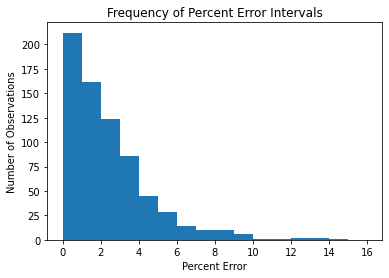

In [35]:
plt.hist(ss_percent_error['Percent Error'],bins=pe_bin_cutoffs)
plt.title('Frequency of Percent Error Intervals')
plt.xlabel('Percent Error')
plt.ylabel('Number of Observations')

In [36]:
# A sampling of the percent error and residual values
print(ss_percent_error.columns)
ss_percent_error.head()

Index(['Last Name', 'First Name', 'Year', 'Predicted Value', 'Actual Value',
       'Residual', 'Percent Error'],
      dtype='object')


,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
0,Abreu,Jose,2015.0,26.257388,25.7,-0.557388,2.122785
1,Altuve,Jose,2015.0,28.298135,28.4,0.101865,0.359971
2,Andrus,Elvis,2015.0,28.788856,27.7,-1.088856,3.782212
3,Arenado,Nolan,2015.0,26.863798,26.1,-0.763798,2.843226
4,Aybar,Erick,2015.0,28.928925,28.0,-0.928925,3.211059


In [37]:
ss_percent_error = ss_percent_error.reset_index()
ss_percent_error = ss_percent_error.drop(columns='index')
ss_percent_error = ss_percent_error.drop(columns='level_0')

KeyError: "['level_0'] not found in axis"

In [ ]:


num_overestimates = 0
num_underestimates = 0
one_percent = 0
three_percent = 0
five_percent = 0
ten_percent = 0
gt_ten_percent = 0
for row in range(0,len(ss_percent_error)):
    if (ss_percent_error['Residual'][row] < 0):
        num_overestimates = num_overestimates + 1
    if (ss_percent_error['Residual'][row] > 0):
        num_underestimates = num_underestimates + 1
    if (abs(ss_percent_error['Percent Error'][row]) < 1):
        one_percent = one_percent + 1
    if (1 < abs(ss_percent_error['Percent Error'][row]) < 3):
        three_percent = three_percent + 1
    if (3 < abs(ss_percent_error['Percent Error'][row]) < 5):
        five_percent = five_percent + 1
    if (5 < abs(ss_percent_error['Percent Error'][row]) < 10):
        ten_percent = ten_percent + 1
    if (abs(ss_percent_error['Percent Error'][row]) > 10):
        gt_ten_percent = gt_ten_percent + 1

percent_overestimated = round((num_overestimates/len(ss_percent_error))*100,2)
print("Percent of observations which were overestimated: " + str(percent_overestimated))
percent_underestimated = round((num_underestimates/len(ss_percent_error))*100,2)
print("Percent of observations which were underestimated: " + str(percent_underestimated))
one_percent_p = round((one_percent/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than one percent: " + str(one_percent_p))
three_percent_p = round((three_percent/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between one percent and three percent: " + str(three_percent_p))
five_percent_p = round((five_percent/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between three percent and five percent: " + str(five_percent_p))
ten_percent_p = round((ten_percent/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of percent error between five percent and ten percent: " + str(ten_percent_p))
gt_ten_percent_p = round((gt_ten_percent/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of percent error greater than ten percent: " + str(gt_ten_percent_p))

In [ ]:
r_bin_cutoffs = [-4, -3, -2, -1, -0, 1, 2, 3, 4]

In [ ]:
plt.hist(ss_percent_error['Residual'],bins=r_bin_cutoffs)
plt.title("Residual Frequency")
plt.xlabel("Residual Range")
plt.ylabel("Number of Observations")

In [ ]:
print("sprint speed percent error: " + str(round(ss_percent_error['Percent Error'].min(),2)))

In [ ]:
print("Maximum sprint speed residual: " + str(round(ss_percent_error['Residual'].max(),4)))

In [ ]:
print("Minimum sprint speed residual: " + str(round(ss_percent_error['Residual'].min(),4)))

In [ ]:
residual_g1 = 0
residual_g2 = 0
residual_g3 = 0
residual_g4 = 0
residual_g5 = 0
residual_g6 = 0
residual_g7 = 0
residual_g8 = 0
for row in range(0,len(ss_percent_error)):
    if (abs(ss_percent_error['Residual'][row]) < .5):
        residual_g1 = residual_g1 + 1
    if (0.5 < abs(ss_percent_error['Residual'][row]) < 1):
        residual_g2 = residual_g2 + 1
    if (1 < abs(ss_percent_error['Residual'][row]) < 1.5):
        residual_g3 = residual_g3 + 1
    if (1.5 < abs(ss_percent_error['Residual'][row]) < 2):
        residual_g4 = residual_g4 + 1
    if (2 < abs(ss_percent_error['Residual'][row]) < 2.5):
        residual_g5 = residual_g5 + 1
    if (2.5 < abs(ss_percent_error['Residual'][row]) < 3):
        residual_g6 = residual_g6 + 1
    if (3 < abs(ss_percent_error['Residual'][row]) < 3.5):
        residual_g7 = residual_g7 + 1
    if (3.5 < abs(ss_percent_error['Residual'][row])):
        residual_g8 = residual_g8 + 1

residual_g1_p = round((residual_g1/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual less than 0.5: " + str(residual_g1_p))
residual_g2_p = round((residual_g2/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 0.5 and 1: " + str(residual_g2_p))
residual_g3_p = round((residual_g3/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 1 and 1.5: " + str(residual_g3_p))
residual_g4_p = round((residual_g4/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 1.5 and 2: " + str(residual_g4_p))
residual_g5_p = round((residual_g5/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 2 and 2.5: " + str(residual_g5_p))
residual_g6_p = round((residual_g6/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 2.5 and 3: " + str(residual_g6_p))
residual_g7_p = round((residual_g7/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual between 3 and 3.5: " + str(residual_g7_p))
residual_g8_p = round((residual_g8/len(ss_percent_error))*100,2)
print("Percent of observations with absolute value of residual greater than 3.5: " + str(residual_g8_p))

We are satisfied with the accuracy of the sprint speed model overall. Just under half of the residuals had absolute value less than 0.5, which is fairly good. The sprint speed model seems to be a bit less accurate than the other offensive value models (OPS+, wRC+, xWOBA, UBR), but nonetheless accurate enough.\